# Visualizations

In [1]:
import utils.common
import evaluation
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [2]:
def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

In [32]:
ml_ae = pd.read_csv('../evals/AE_ML_10_epochs.csv', index_col = 0)
ml_ae_2 = pd.read_csv('../evals/AE_ML_10_epochs_2.csv', index_col=0)
ml_n = pd.read_csv('../evals/NN_ML_10_epochs.csv', index_col=0)
msd_ae = pd.read_csv('../evals/AE_MSD_10_epochs.csv', index_col = 0)
msd_nn = pd.read_csv('../evals/NN_MSD_10_epochs.csv', index_col = 0)
ml_ae_v2 = pd.read_csv('../evals/V2_ML_10_epochs.csv', index_col = 0)
msd_ae_v2 = pd.read_csv('../evals/V2_MSD_10_epochs.csv', index_col = 0)

In [33]:
ml_ae_2.name = 'NeuralLogicRec_AE_ML_10_epoch'
ml_ae_2

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
0,0.652330,48,0.023697,0.091610,0.063385,0.119575,0.109566,32,0.701218,0.674837,0.151827,1,0.144618,0.069997,0.084283,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.132343,0.054622
1,0.731179,48,0.038339,0.122724,0.085252,0.123629,0.115570,32,0.763130,0.746471,0.152115,2,0.204053,0.095994,0.116291,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.169591,0.075691
2,0.760323,48,0.038821,0.122339,0.082844,0.120885,0.112857,32,0.751180,0.732762,0.151099,3,0.215354,0.101138,0.122730,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.176131,0.075135
3,0.769244,48,0.038339,0.127733,0.086504,0.122720,0.114944,32,0.745447,0.727308,0.150975,4,0.230899,0.109720,0.133209,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.188991,0.082378
4,0.759930,48,0.040555,0.135343,0.090261,0.124603,0.116555,32,0.758637,0.743215,0.150769,5,0.238360,0.113671,0.137209,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.192319,0.082109
5,0.757961,48,0.041614,0.140256,0.096426,0.125587,0.118557,32,0.753908,0.736426,0.151282,6,0.231996,0.110375,0.133761,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.189978,0.080907
6,0.778054,48,0.039399,0.133128,0.089394,0.122638,0.114383,32,0.746092,0.722856,0.150052,7,0.226071,0.111094,0.133713,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.190154,0.082131
7,0.769527,48,0.039399,0.132357,0.089587,0.122876,0.114833,32,0.745112,0.722708,0.150569,8,0.238470,0.113669,0.137682,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.193351,0.084332
8,0.771007,48,0.043348,0.137848,0.094692,0.123567,0.116266,32,0.757126,0.738580,0.150713,9,0.239421,0.113899,0.137538,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.192700,0.085362
9,0.776163,48,0.037183,0.130527,0.086119,0.123099,0.114847,32,0.737067,0.714867,0.149654,10,0.239860,0.114781,0.138949,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.195501,0.083909


In [34]:
ml_n

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
0,0.729448,48,0.002312,0.008573,0.005105,0.114461,0.102739,32,0.624941,0.608300,0.153773,1,0.152591,0.063888,0.079508,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.116411,0.040059
1,0.734126,48,0.002408,0.008573,0.005491,0.112039,0.099561,32,0.634478,0.619209,0.152154,2,0.151458,0.061822,0.077722,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.113515,0.038418
2,0.729989,48,0.002312,0.008477,0.005587,0.113655,0.101294,32,0.629057,0.612675,0.153453,3,0.152226,0.062146,0.078264,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114509,0.039359
3,0.726818,48,0.002216,0.008670,0.005298,0.111906,0.100026,32,0.625613,0.613215,0.152327,4,0.146374,0.062529,0.077901,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.116675,0.040487
4,0.731694,48,0.002408,0.008766,0.005202,0.113158,0.102055,32,0.630753,0.612282,0.153071,5,0.150177,0.061956,0.077811,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114912,0.039543
5,0.728125,48,0.002312,0.008381,0.005202,0.113586,0.101377,32,0.630443,0.615662,0.153073,6,0.146227,0.061026,0.077099,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114641,0.039469
6,0.733362,48,0.002408,0.008381,0.005394,0.112709,0.101737,32,0.630597,0.615974,0.151863,7,0.151421,0.061855,0.077599,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114122,0.038348
7,0.723337,48,0.002601,0.009151,0.005683,0.112882,0.104099,32,0.633063,0.615159,0.152705,8,0.145971,0.060849,0.077049,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.115636,0.040337
8,0.717811,48,0.002890,0.009826,0.005972,0.109322,0.099759,32,0.634163,0.618171,0.152972,9,0.150287,0.062603,0.078564,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.115914,0.040041
9,0.719930,48,0.003275,0.010885,0.007128,0.115578,0.105119,32,0.631700,0.615178,0.154509,10,0.150324,0.063295,0.080898,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.120778,0.043675


In [41]:
tuples = [['MovieLens', 'Simple'], ['MovieLens', 'AE'], ['MovieLens', 'AEv2'], ['MSD', 'Simple'],  ['MSD', 'AE'], ['MSD', 'AEv2']]
index = pd.MultiIndex.from_tuples(tuples, names=['dataset', 'name'])
comparison = pd.DataFrame([ml_n.iloc[-1], ml_ae_2.iloc[-1], ml_ae_v2.iloc[-1], msd_nn.iloc[-1], msd_ae.iloc[-1], msd_ae_v2.iloc[-1]], index=index)
comparison

accuracy  batch_size  coverage@1  coverage@10  coverage@5  \
dataset   name                                                                
MovieLens Simple  0.719930          48    0.003275     0.010885    0.007128   
          AE      0.776163          48    0.037183     0.130527    0.086119   
          AEv2    0.801578          24    0.131201     0.351797    0.264907   
MSD       Simple  0.514828          48    0.005662     0.023242    0.014601   
          AE      0.615584          48    0.172676     0.501043    0.378129   
          AEv2    0.742965          24    0.359505     0.795590    0.658969   

                  diversity@10  diversity@5  embedding_dim    epc@10  \
dataset   name                                                         
MovieLens Simple      0.115578     0.105119             32  0.631700   
          AE          0.123099     0.114847             32  0.737067   
          AEv2        0.130261     0.123073             32  0.815835   
MSD       Simple      0.257474     0.225541             32  0.846082   
          AE          0.229299     0.219616             32  0.934985   
          AEv2        0.222276     0.212172             32  0.955184   

                     epc@5     epd@5  epochs_trained     map@1    map@10  \
dataset   name                                                             
MovieLens Simple  0.615178  0.154509              10  0.150324  0.063295   
          AE      0.714867  0.149654              10  0.239860  0.114781   
          AEv2    0.804867  0.151589              10  0.251048  0.122956   
MSD       Simple  0.834268  0.298964              10  0.053309  0.019939   
          AE      0.929920  0.275583              10  0.069461  0.026149   
          AEv2    0.953225  0.281443              10  0.118032  0.045279   

                     map@5                             name  nr_hidden_layers  \
dataset   name                                                                  
MovieLens Simple  0.080898   NeuralLogicRec_NN_ML_10_epochs                 3   
          AE      0.138949    NeuralLogicRec_AE_ML_10_epoch                 3   
          AEv2    0.147293   NeuralLogicRec_V2_ML_10_epochs                 3   
MSD       Simple  0.025759  NeuralLogicRec_NN_MSD_10_epochs                 3   
          AE      0.033759  NeuralLogicRec_AE_MSD_10_epochs                 3   
          AEv2    0.057694  NeuralLogicRec_V2_MSD_10_epochs                 3   

                  nr_item_samples  precision@5  recall@5  
dataset   name                                            
MovieLens Simple             4096     0.120778  0.043675  
          AE                 4096     0.195501  0.083909  
          AEv2               4096     0.204833  0.092403  
MSD       Simple             4096     0.043718  0.021577  
          AE                 4096     0.058108  0.029146  
          AEv2               4096     0.091097  0.046271

In [42]:
metrics = comparison[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10']].transpose()

In [43]:
print(metrics.to_latex(float_format = "%.3f", bold_rows=True))
metrics

\begin{tabular}{lrrrrrr}
\toprule
\textbf{dataset} & \multicolumn{3}{l}{MovieLens} & \multicolumn{3}{l}{MSD} \\
\textbf{name} &    Simple &    AE &  AEv2 & Simple &    AE &  AEv2 \\
\midrule
\textbf{map@1       } &     0.150 & 0.240 & 0.251 &  0.053 & 0.069 & 0.118 \\
\textbf{map@5       } &     0.081 & 0.139 & 0.147 &  0.026 & 0.034 & 0.058 \\
\textbf{map@10      } &     0.063 & 0.115 & 0.123 &  0.020 & 0.026 & 0.045 \\
\textbf{diversity@5 } &     0.105 & 0.115 & 0.123 &  0.226 & 0.220 & 0.212 \\
\textbf{diversity@10} &     0.116 & 0.123 & 0.130 &  0.257 & 0.229 & 0.222 \\
\textbf{epc@5       } &     0.615 & 0.715 & 0.805 &  0.834 & 0.930 & 0.953 \\
\textbf{epc@10      } &     0.632 & 0.737 & 0.816 &  0.846 & 0.935 & 0.955 \\
\textbf{epd@5       } &     0.155 & 0.150 & 0.152 &  0.299 & 0.276 & 0.281 \\
\textbf{coverage@1  } &     0.003 & 0.037 & 0.131 &  0.006 & 0.173 & 0.360 \\
\textbf{coverage@5  } &     0.007 & 0.086 & 0.265 &  0.015 & 0.378 & 0.659 \\
\textbf{coverage@10 } &     0

dataset      MovieLens                           MSD                    
name            Simple        AE      AEv2    Simple        AE      AEv2
map@1         0.150324  0.239860  0.251048  0.053309  0.069461  0.118032
map@5         0.080898  0.138949  0.147293  0.025759  0.033759  0.057694
map@10        0.063295  0.114781  0.122956  0.019939  0.026149  0.045279
diversity@5   0.105119  0.114847  0.123073  0.225541  0.219616  0.212172
diversity@10  0.115578  0.123099  0.130261  0.257474  0.229299  0.222276
epc@5         0.615178  0.714867  0.804867  0.834268  0.929920  0.953225
epc@10        0.631700  0.737067  0.815835  0.846082  0.934985  0.955184
epd@5         0.154509  0.149654  0.151589  0.298964  0.275583  0.281443
coverage@1    0.003275  0.037183  0.131201  0.005662  0.172676  0.359505
coverage@5    0.007128  0.086119  0.264907  0.014601  0.378129  0.658969
coverage@10   0.010885  0.130527  0.351797  0.023242  0.501043  0.795590

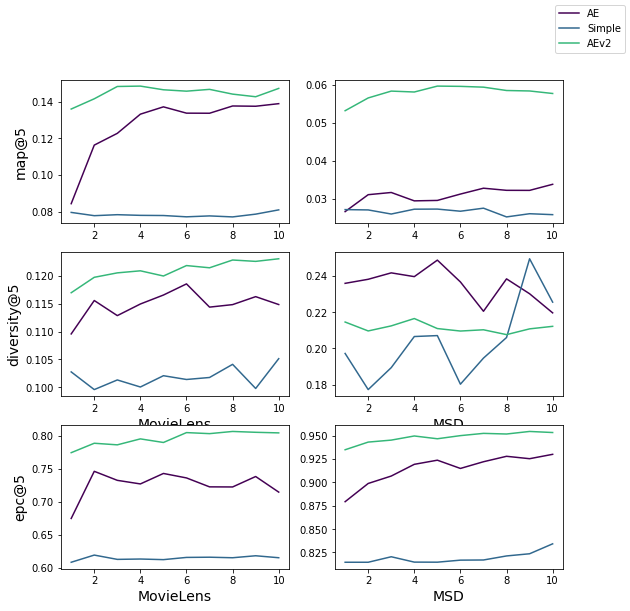

In [49]:
col = get_colors(range(3))
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(321)
ax1.plot(ml_ae_2.epochs_trained, ml_ae_2['map@5'], color=col[0])
ax1.plot(ml_n.epochs_trained, ml_n['map@5'],color=col[1])
ax1.plot(ml_ae_v2.epochs_trained, ml_ae_v2['map@5'],color=col[2])
ax1.set_ylabel('map@5', fontsize=14)

ax2 = fig.add_subplot(322)
ax2.plot(ml_ae_2.epochs_trained, msd_ae['map@5'], color=col[0])
ax2.plot(ml_n.epochs_trained, msd_nn['map@5'],color=col[1])
ax2.plot(msd_ae_v2.epochs_trained, msd_ae_v2['map@5'],color=col[2])

ax3 = fig.add_subplot(323)
ax3.plot(ml_ae_2.epochs_trained, ml_ae_2['diversity@5'], color=col[0])
ax3.plot(ml_n.epochs_trained, ml_n['diversity@5'],color=col[1])
ax3.plot(ml_ae_v2.epochs_trained, ml_ae_v2['diversity@5'],color=col[2])
ax3.set_xlabel('MovieLens', fontsize=14)
ax3.set_ylabel('diversity@5', fontsize=14)

ax4 = fig.add_subplot(324)
ax4.plot(ml_ae_2.epochs_trained, msd_ae['diversity@5'], color=col[0])
ax4.plot(ml_n.epochs_trained, msd_nn['diversity@5'],color=col[1])
ax4.plot(msd_ae_v2.epochs_trained, msd_ae_v2['diversity@5'],color=col[2])
ax4.set_xlabel('MSD', fontsize=14)

ax5 = fig.add_subplot(325)
ax5.plot(ml_ae_2.epochs_trained, ml_ae_2['epc@5'], color=col[0])
ax5.plot(ml_n.epochs_trained, ml_n['epc@5'],color=col[1])
ax5.plot(ml_ae_v2.epochs_trained, ml_ae_v2['epc@5'],color=col[2])
ax5.set_xlabel('MovieLens', fontsize=14)
ax5.set_ylabel('epc@5', fontsize=14)

ax6 = fig.add_subplot(326)
ax6.plot(ml_ae_2.epochs_trained, msd_ae['epc@5'], color=col[0])
ax6.plot(ml_n.epochs_trained, msd_nn['epc@5'],color=col[1])
ax6.plot(msd_ae_v2.epochs_trained, msd_ae_v2['epc@5'],color=col[2])
ax6.set_xlabel('MSD', fontsize=14)
fig.legend(['AE', 'Simple','AEv2'], fontsize=10)
plt.savefig('../plots/NLR_architectures_history.pdf')

In [25]:
msd_div_1 = pd.read_csv('../evals/MSD_div_fix_0.5.csv', index_col = 0)
msd_div_2 = pd.read_csv('../evals/MSD_div_fix_1.0.csv', index_col=0)
msd_div_3 = pd.read_csv('../evals/MSD_div_fix_2.0.csv', index_col=0)
msd_div_4 = pd.read_csv('../evals/MSD_div_fix_4.0.csv', index_col = 0)

In [26]:
ml_div_1 = pd.read_csv('../evals/ML_div_0.25.csv', index_col = 0)
ml_div_2 = pd.read_csv('../evals/ML_div_0.5.csv', index_col = 0)
ml_div_3 = pd.read_csv('../evals/ML_div_1.0.csv', index_col=0)
ml_div_4 = pd.read_csv('../evals/ML_div_2.0.csv', index_col=0)

In [27]:
msd_div_results = pd.DataFrame([msd_div_1.iloc[-1], msd_div_2.iloc[-1], msd_div_3.iloc[-1], msd_div_4.iloc[-1]])
ml_div_results = pd.DataFrame([ml_div_1.iloc[-1], ml_div_2.iloc[-1], ml_div_3.iloc[-1], ml_div_4.iloc[-1]])

In [28]:
print(msd_div_results[['name',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5','coverage@1' ]].to_latex(float_format = "%.3f", index=False))

print(msd_div_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                           name &  diversity@5 &  diversity@10 &  epc@5 &  epd@5 &  coverage@5 &  coverage@1 \\
\midrule
 NeuralLogicRec\_MSD\_div\_fix\_0.5 &        0.240 &         0.241 &  0.918 &  0.283 &       0.347 &       0.156 \\
 NeuralLogicRec\_MSD\_div\_fix\_1.0 &        0.221 &         0.227 &  0.920 &  0.276 &       0.361 &       0.160 \\
 NeuralLogicRec\_MSD\_div\_fix\_2.0 &        0.220 &         0.227 &  0.917 &  0.275 &       0.351 &       0.157 \\
 NeuralLogicRec\_MSD\_div\_fix\_4.0 &        0.228 &         0.233 &  0.916 &  0.279 &       0.356 &       0.157 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                           name &  map@1 &  map@5 &  map@10 \\
\midrule
 NeuralLogicRec\_MSD\_div\_fix\_0.5 &  0.086 &  0.041 &   0.032 \\
 NeuralLogicRec\_MSD\_div\_fix\_1.0 &  0.079 &  0.039 &   0.030 \\
 NeuralLogicRec\_MSD\_div\_fix\_2.0 &  0.084 &  0.040 &   0.031 \\
 NeuralLogicRec\_MSD\_div\_fix\_4.0 &  0.077 &  0.

In [24]:
print(ml_div_results[['name',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5','coverage@1' ]].to_latex(float_format = "%.3f", index=False))

print(ml_div_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                       name &  diversity@5 &  diversity@10 &  epc@5 &  epd@5 &  coverage@5 &  coverage@1 \\
\midrule
 NeuralLogicRec\_ML\_div\_0.25 &        0.112 &         0.121 &  0.734 &  0.148 &       0.122 &       0.058 \\
  NeuralLogicRec\_ML\_div\_0.5 &        0.112 &         0.121 &  0.744 &  0.149 &       0.119 &       0.056 \\
  NeuralLogicRec\_ML\_div\_1.0 &        0.113 &         0.122 &  0.730 &  0.148 &       0.112 &       0.053 \\
  NeuralLogicRec\_ML\_div\_2.0 &        0.112 &         0.121 &  0.743 &  0.148 &       0.114 &       0.055 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                       name &  map@1 &  map@5 &  map@10 \\
\midrule
 NeuralLogicRec\_ML\_div\_0.25 &  0.239 &  0.139 &   0.115 \\
  NeuralLogicRec\_ML\_div\_0.5 &  0.235 &  0.138 &   0.114 \\
  NeuralLogicRec\_ML\_div\_1.0 &  0.242 &  0.140 &   0.116 \\
  NeuralLogicRec\_ML\_div\_2.0 &  0.241 &  0.141 &   0.117 \\
\bottomrule
\end{tabular}



In [3]:
msd_nov_1 = pd.read_csv('../evals/MSD_nov_v2_0.1.csv', index_col = 0)
msd_nov_2 = pd.read_csv('../evals/MSD_nov_v2_0.25.csv', index_col = 0)
msd_nov_3 = pd.read_csv('../evals/MSD_nov_v2_0.5.csv', index_col=0)
msd_nov_4 = pd.read_csv('../evals/MSD_nov_v2_1.0.csv', index_col=0)

In [4]:
ml_nov_1 = pd.read_csv('../evals/ML_nov_v2_0.1.csv', index_col = 0)
ml_nov_2 = pd.read_csv('../evals/ML_nov_v2_0.25.csv', index_col = 0)
ml_nov_3 = pd.read_csv('../evals/ML_nov_v2_0.5.csv', index_col=0)
ml_nov_4 = pd.read_csv('../evals/ML_nov_v2_1.0.csv', index_col=0)

In [5]:
msd_nov_results = pd.DataFrame([msd_nov_1.iloc[-1], msd_nov_2.iloc[-1], msd_nov_3.iloc[-1], msd_nov_4.iloc[-1]])
msd_nov_results

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
4,0.772464,24,0.221692,0.583433,0.456198,0.218877,0.208548,32,0.943721,0.940821,0.275495,5,0.110304,0.042272,0.054383,NeuralLogicRec_MSD_nov_v2_0.1,3,4096,0.087844,0.044731
4,0.770287,24,0.197706,0.519666,0.399136,0.219208,0.211446,32,0.942017,0.939143,0.276672,5,0.100836,0.039301,0.050538,NeuralLogicRec_MSD_nov_v2_0.25,3,4096,0.082597,0.041620
4,0.771666,24,0.231079,0.586561,0.460816,0.214935,0.203043,32,0.952836,0.951708,0.276200,5,0.103044,0.040126,0.051568,NeuralLogicRec_MSD_nov_v2_0.5,3,4096,0.084287,0.042520
4,0.773165,24,0.232271,0.580453,0.457688,0.204984,0.192651,32,0.958941,0.958621,0.274175,5,0.094043,0.036980,0.047076,NeuralLogicRec_MSD_nov_v2_1.0,3,4096,0.078572,0.039671


In [6]:
ml_nov_results = pd.DataFrame([ml_nov_1.iloc[-1], ml_nov_2.iloc[-1], ml_nov_3.iloc[-1], ml_nov_4.iloc[-1]])
ml_nov_results

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
4,0.803988,24,0.060399,0.175513,0.128408,0.124185,0.116167,32,0.784191,0.770387,0.150516,5,0.249189,0.116896,0.143450,NeuralLogicRec_ML_nov_v2_0.1,3,4096,0.200474,0.081808
4,0.805965,24,0.073307,0.201329,0.149600,0.125918,0.118173,32,0.798175,0.785616,0.150938,5,0.254328,0.118133,0.144081,NeuralLogicRec_ML_nov_v2_0.25,3,4096,0.201341,0.085410
4,0.803435,24,0.076582,0.204701,0.152297,0.126170,0.118727,32,0.807822,0.794861,0.151463,5,0.239859,0.112013,0.137543,NeuralLogicRec_ML_nov_v2_0.5,3,4096,0.194919,0.081520
4,0.805139,24,0.097293,0.217705,0.172238,0.131176,0.126061,32,0.869737,0.868388,0.155009,5,0.198418,0.093430,0.113172,NeuralLogicRec_ML_nov_v2_1.0,3,4096,0.166782,0.068365


In [7]:
print(msd_nov_results[['name',
       'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5','coverage@10' ]].to_latex(float_format = "%.3f", index=False))

print(msd_nov_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                           name &  epc@5 &  epc@10 &  epd@5 &  coverage@1 &  coverage@5 &  coverage@10 \\
\midrule
  NeuralLogicRec\_MSD\_nov\_v2\_0.1 &  0.941 &   0.944 &  0.275 &       0.222 &       0.456 &        0.583 \\
 NeuralLogicRec\_MSD\_nov\_v2\_0.25 &  0.939 &   0.942 &  0.277 &       0.198 &       0.399 &        0.520 \\
  NeuralLogicRec\_MSD\_nov\_v2\_0.5 &  0.952 &   0.953 &  0.276 &       0.231 &       0.461 &        0.587 \\
  NeuralLogicRec\_MSD\_nov\_v2\_1.0 &  0.959 &   0.959 &  0.274 &       0.232 &       0.458 &        0.580 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                           name &  map@1 &  map@5 &  map@10 \\
\midrule
  NeuralLogicRec\_MSD\_nov\_v2\_0.1 &  0.110 &  0.054 &   0.042 \\
 NeuralLogicRec\_MSD\_nov\_v2\_0.25 &  0.101 &  0.051 &   0.039 \\
  NeuralLogicRec\_MSD\_nov\_v2\_0.5 &  0.103 &  0.052 &   0.040 \\
  NeuralLogicRec\_MSD\_nov\_v2\_1.0 &  0.094 &  0.047 &   0.037 \\
\bottomrule
\

In [8]:
print(ml_nov_results[['name',
       'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5','coverage@10' ]].to_latex(float_format = "%.3f", index=False))

print(ml_nov_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                          name &  epc@5 &  epc@10 &  epd@5 &  coverage@1 &  coverage@5 &  coverage@10 \\
\midrule
  NeuralLogicRec\_ML\_nov\_v2\_0.1 &  0.770 &   0.784 &  0.151 &       0.060 &       0.128 &        0.176 \\
 NeuralLogicRec\_ML\_nov\_v2\_0.25 &  0.786 &   0.798 &  0.151 &       0.073 &       0.150 &        0.201 \\
  NeuralLogicRec\_ML\_nov\_v2\_0.5 &  0.795 &   0.808 &  0.151 &       0.077 &       0.152 &        0.205 \\
  NeuralLogicRec\_ML\_nov\_v2\_1.0 &  0.868 &   0.870 &  0.155 &       0.097 &       0.172 &        0.218 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                          name &  map@1 &  map@5 &  map@10 \\
\midrule
  NeuralLogicRec\_ML\_nov\_v2\_0.1 &  0.249 &  0.143 &   0.117 \\
 NeuralLogicRec\_ML\_nov\_v2\_0.25 &  0.254 &  0.144 &   0.118 \\
  NeuralLogicRec\_ML\_nov\_v2\_0.5 &  0.240 &  0.138 &   0.112 \\
  NeuralLogicRec\_ML\_nov\_v2\_1.0 &  0.198 &  0.113 &   0.093 \\
\bottomrule
\end{tabula

In [11]:
ml_nov_results['dataset'] = 'MovieLens'
ml_nov_results['novelty_weight'] = ml_nov_results['name'].str.replace('NeuralLogicRec_ML_nov_v2_', '').astype(float)
msd_nov_results['dataset'] = 'MSD'
msd_nov_results['novelty_weight'] = msd_nov_results['name'].str.replace('NeuralLogicRec_MSD_nov_v2_', '').astype(float)
nov_results = pd.concat([ml_nov_results, msd_nov_results], sort=False)

In [14]:
ml_nov_results = ml_nov_results.reset_index()
msd_nov_results = msd_nov_results.reset_index()

In [49]:
ml_nov_results

,index,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,...,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5,dataset,novelty_weight
0,4,0.803988,24,0.060399,0.175513,0.128408,0.124185,0.116167,32,0.784191,...,0.249189,0.116896,0.143450,NeuralLogicRec_ML_nov_v2_0.1,3,4096,0.200474,0.081808,MovieLens,0.10
1,4,0.805965,24,0.073307,0.201329,0.149600,0.125918,0.118173,32,0.798175,...,0.254328,0.118133,0.144081,NeuralLogicRec_ML_nov_v2_0.25,3,4096,0.201341,0.085410,MovieLens,0.25
2,4,0.803435,24,0.076582,0.204701,0.152297,0.126170,0.118727,32,0.807822,...,0.239859,0.112013,0.137543,NeuralLogicRec_ML_nov_v2_0.5,3,4096,0.194919,0.081520,MovieLens,0.50
3,4,0.805139,24,0.097293,0.217705,0.172238,0.131176,0.126061,32,0.869737,...,0.198418,0.093430,0.113172,NeuralLogicRec_ML_nov_v2_1.0,3,4096,0.166782,0.068365,MovieLens,1.00


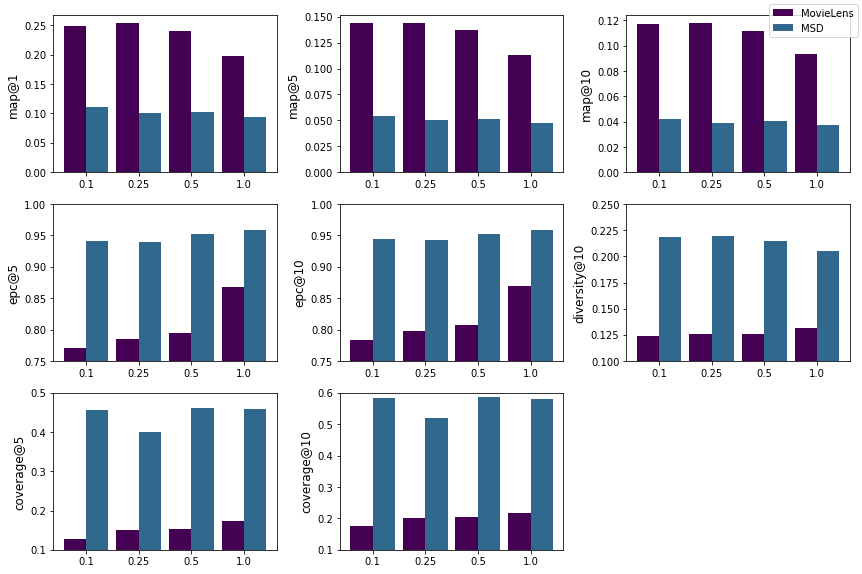

In [62]:
width = 0.85
bar_c = get_colors(range(3))
fig = plt.figure(figsize=(12,8))
def plot_prop(ax, ml_data, msd_data, prop):
    ax.bar(ml_data.index - width/4, ml_data[prop], width/2, label='MovieLens', color=bar_c[0])
    
    ax.bar(msd_data.index + width/4, msd_data[prop], width/2, label='MSD', color=bar_c[1])
    ax.set_xticks(ml_data.index)
    ax.set_xticklabels(ml_data.novelty_weight)
    

    
    ax.set_ylabel(prop, fontsize=12)
    
ax1 = fig.add_subplot(331)
# ax1.set_xlabel('Novelty weight', fontsize=14)
plot_prop(ax1, ml_nov_results, msd_nov_results, 'map@1')
ax2 = fig.add_subplot(332)
plot_prop(ax2, ml_nov_results, msd_nov_results, 'map@5')
ax3 = fig.add_subplot(333)
plot_prop(ax3, ml_nov_results, msd_nov_results, 'map@10')
ax4 = fig.add_subplot(3,3,4)
ax4.set_ylim(0.75, 1.0)
plot_prop(ax4, ml_nov_results, msd_nov_results, 'epc@5')
ax5 = fig.add_subplot(3,3,5)
ax5.set_ylim(0.75,1.0)
plot_prop(ax5, ml_nov_results, msd_nov_results, 'epc@10')
ax6 = fig.add_subplot(3,3,6)
ax6.set_ylim(0.1, 0.25)
plot_prop(ax6, ml_nov_results, msd_nov_results, 'diversity@10')
ax7 = fig.add_subplot(3,3,7)
ax7.set_ylim(0.1,0.5)
plot_prop(ax7, ml_nov_results, msd_nov_results, 'coverage@5')
ax8 = fig.add_subplot(3,3,8)
ax8.set_ylim(0.1,0.6)
plot_prop(ax8, ml_nov_results, msd_nov_results, 'coverage@10')

fig.legend(['MovieLens','MSD'])
plt.tight_layout()

fig.savefig('../Graphics/Plots/Novelty_constraint_comparison.pdf')